In [1]:
import pandas as pd
import os
import numpy as np



In [2]:
os.chdir('C:\\RESEARCH\\LUSC\\Stage')

In [3]:
X=pd.read_excel('LUSC_clinical_Stage.xlsx',index_col=0)

In [4]:
X.shape

(501, 324)

In [5]:
x=X.iloc[:,0:322].values
y=X.iloc[:,-1].values

In [6]:
y

array(['Stage IA', 'Stage IB', 'Stage IB', 'Stage IA', 'Stage IIB',
       'Stage IIIA', 'Stage IB', 'Stage IV', 'Stage IB', 'Stage IIB',
       'Stage IV', 'Stage IIB', 'Stage IB', 'Stage IIB', 'Stage IB',
       'Stage IA', 'Stage IIB', 'Stage IB', 'Stage IIIA', 'Stage IB',
       'Stage IB', 'Stage IIB', 'Stage IB', 'Stage IIB', 'Stage IB',
       'Stage IIIA', 'Stage IB', 'Stage IIB', 'Stage IB', 'Stage IA',
       'Stage IB', 'Stage IB', 'Stage IB', 'Stage IB', 'Stage IIIA',
       'Stage IA', 'Stage IIA', 'Stage IB', 'Stage IB', 'Stage IA',
       'Stage IA', 'Stage IB', 'Stage IB', 'Stage IB', 'Stage IA',
       'Stage IIIA', 'Stage IIA', 'Stage IIIA', 'Stage IIIA', 'Stage IB',
       'Stage IB', 'Stage IIIA', 'Stage IIA', 'Stage IB', 'Stage IB',
       'Stage IA', 'Stage IA', 'Stage IB', 'Stage IB', 'Stage IB',
       'Stage IB', 'Stage IA', 'Stage IB', 'Stage IB', 'Stage IA',
       'Stage IIB', 'Stage IB', 'Stage IIA', 'Stage IA', 'Stage IA',
       'Stage IA', 'Stage IIIA', 

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
y

array([1, 2, 2, 1, 5, 7, 2, 9, 2, 5, 9, 5, 2, 5, 2, 1, 5, 2, 7, 2, 2, 5,
       2, 5, 2, 7, 2, 5, 2, 1, 2, 2, 2, 2, 7, 1, 4, 2, 2, 1, 1, 2, 2, 2,
       1, 7, 4, 7, 7, 2, 2, 7, 4, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 5,
       2, 4, 1, 1, 1, 7, 4, 2, 2, 7, 2, 2, 1, 1, 7, 2, 5, 7, 7, 2, 4, 1,
       2, 1, 5, 2, 1, 5, 1, 2, 1, 4, 1, 5, 7, 5, 2, 1, 5, 2, 3, 7, 9, 4,
       5, 7, 2, 2, 1, 1, 9, 7, 2, 1, 7, 5, 3, 8, 1, 4, 2, 2, 2, 7, 2, 7,
       7, 7, 1, 5, 1, 2, 4, 4, 7, 7, 1, 7, 2, 2, 4, 4, 2, 5, 2, 2, 5, 1,
       1, 1, 4, 1, 1, 4, 5, 1, 7, 1, 1, 1, 7, 2, 5, 5, 2, 8, 5, 0, 1, 2,
       5, 2, 2, 2, 1, 1, 2, 4, 2, 2, 7, 7, 2, 2, 4, 2, 5, 4, 4, 2, 5, 1,
       2, 5, 5, 1, 5, 2, 2, 2, 5, 7, 1, 1, 4, 7, 4, 4, 2, 1, 2, 1, 2, 4,
       9, 4, 2, 4, 7, 2, 2, 5, 7, 7, 5, 2, 2, 4, 4, 5, 5, 5, 1, 2, 5, 2,
       4, 2, 5, 2, 5, 1, 5, 2, 2, 2, 5, 2, 7, 2, 4, 2, 5, 4, 1, 1, 1, 4,
       5, 2, 2, 1, 7, 5, 2, 5, 5, 5, 2, 2, 5, 5, 4, 2, 1, 2, 2, 5, 9, 5,
       2, 7, 2, 8, 1, 2, 7, 2, 2, 7, 8, 5, 8, 2, 5,

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [11]:
# Fitting Decision Tree Classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [13]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]+cm[7][7]+cm[8][8]+cm[9][9]) / cm.sum())
accuracy

0.85

Confusion Matrix, without normalization
[[ 0  0  1  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  1 20  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  2 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  3  0  0]
 [ 0  0  1  0  0  0  0  1  0  0]]


<Figure size 720x504 with 0 Axes>

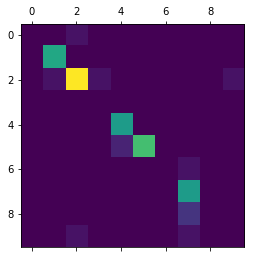

In [14]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.04347826 0.86956522 0.08695652 0.         0.
  0.         0.         0.         0.        ]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.0625     0.9375
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.66666667 0.33333333 0.       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

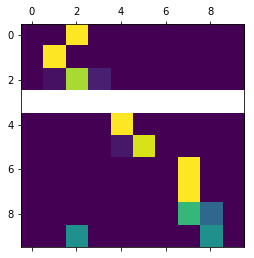

In [21]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [22]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.92      1.00      0.96        12
          2       0.91      0.87      0.89        23
          3       0.00      0.00      0.00         0
          4       0.92      1.00      0.96        11
          5       1.00      0.94      0.97        16
          6       0.00      0.00      0.00         1
          7       0.79      1.00      0.88        11
          8       0.50      0.33      0.40         3
          9       0.00      0.00      0.00         2

avg / total       0.85      0.88      0.86        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [23]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.8482927732876057

In [24]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.9054325624728605

In [ ]:

# Applying Grid Search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier() 


parameter_grid = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "random_state": [0, 1, 2, 3]}      

classifier = DecisionTreeClassifier()           

grid_search = GridSearchCV(classifier, param_grid = parameter_grid,
                           cv = 5, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Best_Score = grid_search.best_score_
Best_Param = grid_search.best_params_

# Applying Random Search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier = DecisionTreeClassifier() 

# Create the random grid
random_grid = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [3, 4, 5, 6, 7 , 8],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.1, 0.2, 0.3],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [20, 25, 30, 35, 40],
                  "min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4],
                  "presort": [False],
                  "random_state": [3, 4, 5, 10, 15]}
               
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=random_grid,
                              n_iter = 100,scoring='neg_mean_absolute_error',
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

random_search.fit(X_train, y_train)

Random_Best_Param = random_search.best_params_
Random_Best_Score = random_search.best_score_

# Applying Bayesian Search
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
from skopt import BayesSearchCV
search_spaces = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "random_state": [0, 1, 2, 3]}

class BayesSearchCV(BayesSearchCV):
    def _run_search(self, x): raise BaseException('Use newer skopt')

opt = BayesSearchCV(classifier, search_spaces, scoring="accuracy", cv = 10, n_jobs=1, random_state=0)
opt.fit(X_train, y_train)

Bayes_Best_Param = opt.best_params_
Bayes_Best_Score = opt.best_score_

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Decision Tree Classification to the Testing Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
